# Preprocesamiento de datos

## Librerías

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import random

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib_venn as vplt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn import preprocessing
from funciones import *

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

## Funciones

In [3]:
def transformColumn(col):
    """
    Encodea la columna de 0 a n-1, siendo n el numero de clases en la columna usando un LabelEncoder de sklearn llamado lb
    Recibe:
        col: columna de pandas
    Devuelve:
        la columna transformada
    """
    return lb.fit_transform(col)

def regionalizacion(row):
    if   row['NOM_ENT'] in ['Baja California\r', 'Baja California Sur\r', 'Sonora\r', 'Sinaloa\r', 'Nayarit\r']:
        return 0 #Noroeste
    elif row['NOM_ENT'] in ['Chihuahua\r', 'Coahuila de Zaragoza\r', 'Durango\r', 'Zacatecas\r', 'San Luis Potosi\r']:
        return 1 #Norte
    elif row['NOM_ENT'] in ['Nuevo Leon\r', 'Tamaulipas\r']:
        return 2 #Noreste
    elif row['NOM_ENT'] in ['Jalisco\r', 'Aguascalientes\r', 'Guanajuato\r', 'Colima\r', 'Michoacan de Ocampo\r']:
        return 3 #Centro Occidente
    elif row['NOM_ENT'] in ['Queretaro\r', 'Hidalgo\r', 'Estado de Mexico\r',  'Ciudad de Mexico\r','Morelos\r', 'Puebla\r', 'Tlaxcala\r']:
        return 4 #Centro Sur
    elif row['NOM_ENT'] in ['Veracruz de Ignacio de la Llave\r', 'Tabasco\r']:
        return 5 #Golfo de México
    elif row['NOM_ENT'] in ['Guerrero\r', 'Oaxaca\r', 'Chiapas\r']:
        return 6 #Pacífico Sur
    elif row['NOM_ENT'] in ['Campeche\r', 'Yucatan\r', 'Quintana Roo\r']:
        return 7 #Península de Yucatán

def clasificacion(row):
    val = [0,0] #ninguno
    
    #abuso y violencia
    if row['P9_8_1'] == 1.0 or row['P9_8_2'] == 1.0 or row['P9_8_3'] == 1.0 or row['P9_8_4'] == 1.0 or row['P9_8_5'] == 1.0 or row['P9_8_6'] == 1.0:
        val[0] = 1
    
    #atencion no autorizada
    if row['P9_8_7'] == 1.0 or row['P9_8_8'] == 1.0 or row['P9_8_9'] == 1.0 or row['P9_8_12'] == 2.0 or row['P9_8_13'] == 2.0:
        val[1] = 1
    
    if val[0]==1 and val[1]==1: #ambas
        return 3
    elif val[1]==1: #atencion no autorizada
        return 2
    elif val[0]==1: #abuso y violencia
        return 1
    else: 
        return 0 #ninguno

## SECCIÓN I. CARACTERÍSTICAS DE LA VIVIENDA Y HOGARES EN LA VIVIENDA

### Cargar datos

In [4]:
ruta_parcial = "../../conjunto_de_datos_endireh_2016_csv/conjunto_de_datos_tviv_endireh_2016/conjunto_de_datos/conjunto_de_datos_tviv_endireh_2016.csv"

seccionI = CargarPandasDataset(ruta_parcial)

#seccionI.iloc[random.choices(range(seccionI.shape[0]), k=5)]
seccionI.iloc[[83867, 107779, 25309, 64234, 81172]]

,ID_VIV,UPM,PROG,VIV_SEL,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,COD_RES,P1_1,...,P1_9,P1_10_1,P1_10_2,P1_10_3,P1_10_4,FAC_VIV,DOMINIO,EST_DIS,UPM_DIS,ESTRATO
83867,2260379.02,2260379,154,2,22,Queretaro\r,6,Corregidora\r,1,2,...,2.0,0.0,1.0,0.0,0.0,132,R\r,4080,12538,2
107779,2900558.02,2900558,124,2,29,Tlaxcala\r,25,San Pablo del Monte\r,1,2,...,NaN,NaN,NaN,NaN,NaN,91,U\r,5340,16156,2
25309,760617.01,760617,51,1,7,Chiapas\r,18,Coapilla\r,1,2,...,NaN,NaN,NaN,NaN,NaN,341,R\r,1290,4017,1
64234,1800193.01,1800193,48,1,18,Nayarit\r,17,Tepic\r,1,2,...,NaN,NaN,NaN,NaN,NaN,99,U\r,3220,9834,3
81172,2200733.02,2200733,110,2,22,Queretaro\r,14,Querétaro\r,1,3,...,NaN,NaN,NaN,NaN,NaN,132,U\r,3930,12132,3


### Hacer columnas One Hot Encoding


Cambiar los valores $2$ a $0$.

Bienes de vivienda (si tienen  televisión ,lavadora , auto, internet, etc) P1_4_{1, 2, 3, ..., 9}.

In [5]:
columnasOHE = [f'P1_4_{i}' for i in range(1,10)]

seccionI = ModificarColumnasValor(df=seccionI, cols=columnasOHE, valorR=2, valorN=0)

### Política de datos faltantes

P1_9 la cantidad de hogares en la vivienda se debe poner la existencia de 1 hogar en la vivienda.

In [6]:
seccionI = ModificarColumnasValor(df=seccionI, cols=['P1_9'], valorR=np.nan, valorN=1)

En P1_3 cambiar el valor nulo 99 por NaN.

In [7]:
seccionI = ModificarColumnasValor(df=seccionI, cols=['P1_3'], valorR=99, valorN=seccionI['P1_3'].median())

Ya que 3 y 4 son los de menor frecuencia y esto da problema la entrenar el algoritmo de clasificación

y que se tratan de un tipo de tubería de no red pública, estas dos serán una nueva categoría y los demás seguirán igual.


### Borrar columnas

La pregunta 1.8. ¿Todas las personas que viven en esta vivienda comparten un mismo gasto para comer? se puede remplazar por ¿cuantos hogares comparten gastos? para solo usar el P1_9 y poder borrar esta.

In [8]:
labels = ['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN', 'COD_RES', 'UPM', 'PROG','FAC_VIV', 'EST_DIS', 'UPM_DIS', 'P1_8']

seccionI = BorrarColumnas(df=seccionI, cols=labels)

In [9]:
seccionI.columns

Index(['ID_VIV', 'VIV_SEL', 'P1_1', 'P1_2', 'P1_2_A', 'P1_3', 'P1_4_1',
       'P1_4_2', 'P1_4_3', 'P1_4_4', 'P1_4_5', 'P1_4_6', 'P1_4_7', 'P1_4_8',
       'P1_4_9', 'P1_5', 'P1_6', 'P1_7', 'P1_9', 'P1_10_1', 'P1_10_2',
       'P1_10_3', 'P1_10_4', 'DOMINIO', 'ESTRATO'],
      dtype='object')

### Guardar dataset

## SECCIÓN II. CARACTERÍSTICAS SOCIODEMOGRÁFICAS DE RESIDENTES DE LA VIVIENDA

### Cargar los datos

In [10]:
ruta_parcial = "../../conjunto_de_datos_endireh_2016_csv/conjunto_de_datos_tsdem_endireh_2016/conjunto_de_datos/conjunto_de_datos_tsdem_endireh_2016.csv"

seccionII = CargarPandasDataset(ruta_parcial)

seccionII.iloc[random.choices(range(seccionII.shape[0]), k=5)]

,ID_VIV,ID_MUJ,UPM,PROG,VIV_SEL,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,HOGAR,...,REN_INF_AD,FN_DIA,FN_MES,FAC_VIV,FAC_MUJ,DOMINIO,ESTRATO,EST_DIS,UPM_DIS,COD_M15
357933,2560724.02,2560724.02.01.02\r,2560724,101,2,25,Sinaloa\r,12,Mazatlán\r,1,...,2.0,NaN,NaN,175,350,R\r,2,4600,14324,1.0
258404,1903262.04,1903262.04.01.04\r,1903262,75,4,19,Nuevo Leon\r,26,Guadalupe\r,1,...,NaN,NaN,NaN,262,0,U\r,3,3340,10433,NaN
189983,1406437.02,1406437.02.01.03\r,1406437,109,2,14,Jalisco\r,101,Tonalá\r,1,...,NaN,NaN,NaN,585,0,U\r,2,2380,7832,NaN
155651,1161587.11,1161587.11.01.01\r,1161587,97,11,11,Guanajuato\r,35,Santa Cruz de Juventino Rosas\r,1,...,NaN,NaN,NaN,295,0,R\r,2,1990,6737,NaN
336429,2403243.02,2403243.02.01.04\r,2403243,196,2,24,San Luis Potosi\r,16,Ebano\r,1,...,NaN,NaN,NaN,177,0,C\r,2,4360,13669,NaN


### Modificar columnas a OHE

Cambiar los valores $2$ a $0$.

In [11]:
columnasOHE = ['P2_8', 'P2_9', 'P2_11', 'P2_12', 'P2_13']

seccionII = ModificarColumnasValor(df=seccionII, cols=columnasOHE, valorR=2, valorN=0)

### Política de datos faltantes

Si P2_7 es mayor a 3 (estudio mínimo la secundaria) se salta la pregunta P2_8 porque asume que sabrán escribir. Por ello, los valores nulos se remplazan por si (1).

In [12]:
columnasNaN = ['P2_8']

seccionII = ModificarColumnasValor(df=seccionII, cols=columnasNaN, valorR=np.nan, valorN=1)

En GRA (grado) hay elementos faltantes que obtendré al calcular la moda por nivel de estudios (NIV) que tienen registrado.

In [13]:
gk = seccionII.groupby('NIV')
    
for grupo in seccionII['NIV'].unique():
    try: # NIV tiene valor nan que da error
        sub_df = seccionII['GRA'].replace(9, gk.get_group(grupo)['GRA'].mode()[0], inplace=True)
    except:
        pass

P2_10 ¿se considera indigena? 9 equivale a no especificado y 8 no sabe. Por lo tanto, pongo 9 valor nulo y 8 como un cuarto valor.

In [14]:
seccionII = ModificarColumnasValor(df=seccionII, cols=['P2_10'], valorR=9, valorN=np.nan)

In [15]:
seccionII = ModificarColumnasValor(df=seccionII, cols=['P2_10'], valorR=8, valorN=4)

### 2.2 Dividir por regiones de méxico.

Para no dividir entre 32 entidades federativas, dividiré el país en principales regiones de México.
Según la regionalización económica de la [CONABIO](http://www.conabio.gob.mx/informacion/metadata/gis/recomgw.xml?_xsl=/db/metadata/xsl/fgdc_html.xsl&_indent=no) existen un total de 8 regiones.
   
<img src="conabio.gob.mx/informacion/gis/layouts/recomgw.png"
     alt="Regiones económicas de Mexico"
     style="float: left; margin-right: 10px;" />
     
Cada código representa a una región como se muestra en la siguiente tabla:

|  Código  | Región              |
|:--------:|:-------------------:|
| 0        | Noroeste            |
| 1        | Norte               |
| 2        | Noreste             |
| 3        | Centro Occidente    |
| 4        | Centro Sur          |
| 5        | Golfo de México     |
| 6        | Pacífico Sur        |
| 7        | Península de Yucatán|


In [16]:
seccionII_reg = InsertarColumnaNueva(df=seccionII, nombreCol='REGION', numeroCol=12, funcion=regionalizacion)

### Discretizar P2_5 y P2_6

del 1 al 30 son las viviendas registradas en la propiedad, en la 96 es si vive en otro lugar, 97 si falleció y 98 si no sabe.

Se discretizará a todos tener valores cercanos y solo 4 categorías.

In [17]:
seccionII_reg = ModificarColumnasValor(df=seccionII_reg, cols=['P2_5'], valorR=range(31), valorN=1)
seccionII_reg = ModificarColumnasValor(df=seccionII_reg, cols=['P2_5'], valorR=96, valorN=2)
seccionII_reg = ModificarColumnasValor(df=seccionII_reg, cols=['P2_5'], valorR=97, valorN=3)
seccionII_reg = ModificarColumnasValor(df=seccionII_reg, cols=['P2_5'], valorR=98, valorN=0)

In [18]:
seccionII_reg = ModificarColumnasValor(df=seccionII_reg, cols=['P2_6'], valorR=range(31), valorN=1)
seccionII_reg = ModificarColumnasValor(df=seccionII_reg, cols=['P2_6'], valorR=96, valorN=2)
seccionII_reg = ModificarColumnasValor(df=seccionII_reg, cols=['P2_6'], valorR=97, valorN=3)
seccionII_reg = ModificarColumnasValor(df=seccionII_reg, cols=['P2_6'], valorR=98, valorN=0)

Según la Ley General de educación:
1. Educacion básica: Preescolar, primaria y secundaria.
2. Educación media superior: Preparatoria o bachillerato.
3. Educación superior: El resto.

Así que serían:
1. Grupo 0: 0 (ninguno).
2. Grupo 1: 1 (preescolar), 2 (primaria) y 3 (secundaria).
2. Grupo 2: 5 (Estudios técnicos o comerciales con primaria terminada), 6 (Estudios técnicos o comerciales con secundaria terminada), 7 (Estudios técnicos o comerciales con preparatoria terminada) y 8 (Normal con primaria o secundaria terminada).
3. Grupo 3: 9 (Normal licenciatura), 10 (Licenciatura o profesional) y 11 (Posgrado (Especialidad, Maestría o Doctorado)).



In [19]:
seccionII_reg = ModificarColumnasValor(df=seccionII_reg, cols=['NIV'], valorR=[1,2,3], valorN=1)
seccionII_reg = ModificarColumnasValor(df=seccionII_reg, cols=['NIV'], valorR=4, valorN=2)
seccionII_reg = ModificarColumnasValor(df=seccionII_reg, cols=['NIV'], valorR=[5,6,7,8], valorN=3)
seccionII_reg = ModificarColumnasValor(df=seccionII_reg, cols=['NIV'], valorR=[9,10,11], valorN=4)

### Borrar columnas

1. N_REN, REN_INF_AD, CODIGO y COD_M15 que son datos metodológicos.
3. FN_DIA y FN_MES fecha de nacimiento día y  mes.no aportan información útil.
4. NOMBRE sin registros.
6. P2_16 se borra porque está reflejado en la variable _T\_INSTRUM_.

In [20]:
labels = ['NOM_ENT', 'NOM_MUN', 'COD_RES', 'COD_RES_E', 'FN_DIA', 'FN_MES', 'NOMBRE', 'HOGAR', 
          'UPM', 'VIV_SEL', 'N_REN', 'REN_MUJ_EL', 'REN_INF_AD', 'FAC_VIV', 'FAC_MUJ',
          'EST_DIS', 'UPM_DIS', 'CODIGO', 'COD_M15', 'PROG', 'P2_16']

seccionII_reg = BorrarColumnas(df=seccionII_reg, cols=labels)

Todos los que tienen NIV 0 (ninguna escolaridad) tienen GRA 0 (ningún grado). Por lo tanto, es correcto decir que si tienen NIV 0 tienen grado nulo.

In [21]:
seccionII_reg.loc[seccionII_reg[seccionII_reg.GRA==0].index, 'GRA'] = np.nan

Al ser muy pocos valores en Residencia de la madre {0}, genera errores con el modelo. Se borran los registros.

 - P2_5 en 0 es que no sabe donde vive la mamá

Un total de 717 registros menos en esta seccion pero 18 en la versión final.

In [22]:
seccionII_reg = seccionII_reg[seccionII_reg.P2_5!=0]

### Guardar dataset

In [23]:
seccionII_reg.reset_index(drop=True, inplace=True) #reajustar el índice

## SECCIÓN III. ELEGIBILIDAD Y VERIFICACIÓN DE ESTADO CONYUGAL DE LA MUJER ELEGIDA DE 15 AÑOS O MÁS

P3_{1,2,3,...,8} tiene informacion que se ve reflejada en la variable T_INSTRUM, por eso se deberían borrar todas.
Ya que en la encuesta general se ve que con base en las preguntas se elige el futuro de T_INSTRUM.
Por ello, no cargamos esta parte de la encuesta.

## SECCIÓN IX. ATENCIÓN OBSTÉTRICA

### Cargar datos

In [24]:
ruta_parcial = "../../conjunto_de_datos_endireh_2016_csv/conjunto_de_datos_tb_sec_ix_endireh_2016/conjunto_de_datos/conjunto_de_datos_tb_sec_ix_endireh_2016.csv"

seccionIX = CargarPandasDataset(ruta_parcial)

seccionIX.iloc[random.choices(range(seccionIX.shape[0]), k=5)]

,ID_VIV,ID_MUJ,UPM,REN_M_ELE,VIV_SEL,PROG,HOGAR,DOMINIO,CVE_ENT,NOM_ENT,...,P9_8_10,P9_8_11,P9_8_12,P9_8_13,P9_8_14,FAC_VIV,FAC_MUJ,ESTRATO,UPM_DIS,EST_DIS
75966,2000717.01,2000717.01.01.02\r,2000717,2,1,25,1,U\r,20,Oaxaca\r,...,NaN,NaN,NaN,NaN,NaN,232,232,2,11038,3590
86339,2202646.16,2202646.16.01.02\r,2202646,2,16,184,1,C\r,22,Queretaro\r,...,NaN,NaN,NaN,NaN,NaN,169,169,2,12457,4040
20443,701531.02,0701531.02.01.01\r,701531,1,2,6,1,U\r,7,Chiapas\r,...,NaN,NaN,NaN,NaN,NaN,294,294,2,3838,1090
29620,921801.03,0921801.03.01.01\r,921801,1,3,54,1,U\r,9,Ciudad de Mexico\r,...,NaN,NaN,NaN,NaN,NaN,749,1498,4,5639,1560
853,100879.04,0100879.04.01.02\r,100879,2,4,13,1,U\r,1,Aguascalientes\r,...,NaN,NaN,NaN,NaN,NaN,82,82,2,249,10


### 2. Preservar los datos de las embarazadas


Borrar los registros de todas aquellas que repondieron que no estuvieron embarazadas entre Octubre 2011 hasta finales 2016 o que no se tenga resgistro de su respuesta. La manera fácil es solo preservar los registros de las que respondieron que sí estuvieron embarazadas en ese periodo de tiempo.

In [25]:
seccionIX = seccionIX[(seccionIX.P9_2 == 1)]

En la pregunta 9.6. ¿En qué año fue su último parto? si el último parto fue antes del 2011, fue aborto (8888) o está embarazada (0000) por primera vez se pasa a la sección X. Se preservan aquellas que tuvieron embarazo después del 2010 y antes del 2017 (sin incluirlos).

En la pregunta 9.7. ¿Dónde atendieron su último parto? si Nadie la atendió porque dio a luz sola (9) se pasa a la sección X. 
Por lo tanto se deben borrar los registros que no contestaron toda la sección.

In [26]:
seccionIX.drop(seccionIX[~(((seccionIX["P9_6"]>2010.0) & (seccionIX["P9_6"]<2017.0)) | (seccionIX["P9_7"]==9))].index, axis=0, inplace=True)

#### 2.2 Conservar solo los registros de hospitales públicos

Borrar aquellos datos mayores al valor 5 (Hospital o Clínica privada, Consultorio Médico particular, En casa con partera o curandera(o), Nadie la atendió, dio a luz sola, Otro) y conservando 99 de datos sin registro.

In [27]:
seccionIX.drop(seccionIX[((seccionIX.P9_7 > 5) & (seccionIX.P9_7 < 20))].index, inplace = True)

### 3. Agregar columnas

#### Pregunta 1

np.nan quedará como sin registro.

In [28]:
seccionIX.insert(24, "P9_1", np.nan) #agregar columna nueva que representa todas las respuestas con valor default nulo

In [29]:
for i in range(1,10):
    seccionIX.loc[seccionIX[F'P9_1_{i}']==1, 'P9_1'] = i-1 #reemplazar los valores en columna nueva

#### Pregunta 5

np.nan quedará como sin registro.

In [30]:
seccionIX.insert(41, "P9_5", np.nan) #agregar columna nueva que representa todas las respuestas con valor default nulo

In [31]:
for i in range(1,12):
    seccionIX.loc[seccionIX[F'P9_5_{i}']==1, 'P9_5'] = i-1 #reemplazar los valores en columna nueva

### 3.2 Crear clasificación

A partir de las respuestas de la pregunta 8, crear columna que va a servir de clasificación para los niveles de violencia obstétrica.

In [32]:
seccionIX_cls = InsertarColumnaNueva(df=seccionIX, nombreCol='P9_8', numeroCol=58, funcion=clasificacion)

#### 3.2.1 Distribución de clases

Ninguno:	64.6%
Abuso y violencia:	17.2%
Atencion no autorizada:	9.2%
Ambos:	9.0%


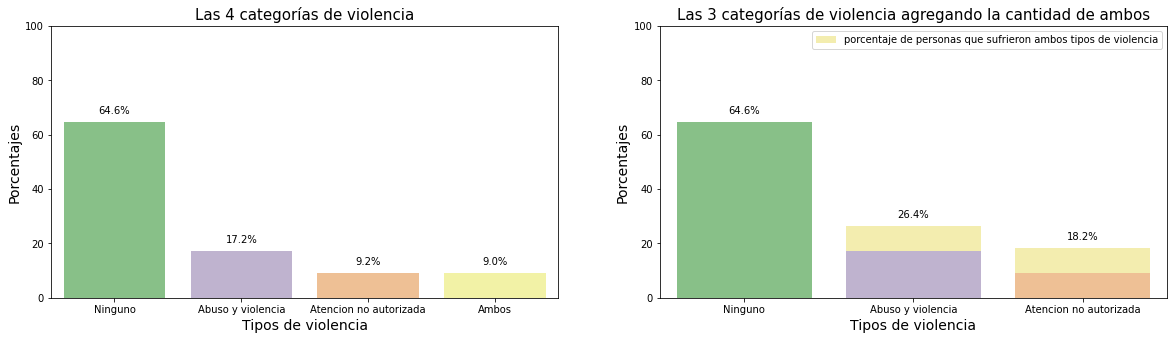

In [33]:
# obtengo las categorias y su cantidad de concurrencias
ocurrencias = seccionIX_cls["P9_8"].value_counts()
# sumo el porcentaje con 1 decimal de 'Ambos' para ' Abuso y violencia' y 'Atencion no autorizada'
oc_ambos = np.around(np.array([ocurrencias[0], ocurrencias[1]+ocurrencias[3], ocurrencias[2]+ocurrencias[3]])/ocurrencias.sum()*1000)/10
# obtengo los porcentajes con 1 decimal de los tipos 'Ninguno', ' Abuso y violencia' y 'Atencion no autorizada'
ocurrencias = np.around(ocurrencias/ocurrencias.sum()*1000)/10
groups = ['Ninguno',  'Abuso y violencia', 'Atencion no autorizada', 'Ambos']

# imprimo los porcentajes
for i,j in zip(groups, ocurrencias):
    print(f'{i}:\t{j}%')

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Grafico los tipos 'Ninguno', ' Abuso y violencia' y 'Atencion no autorizada' y 'Ambos' 
ax = sns.barplot(x=groups, y=ocurrencias, palette = 'Accent', ax=axes[0])
for x, y in enumerate(ocurrencias):
    ax.text(x, y+3, f'{y}%', ha='center')

# Grafico los tipos 'Ninguno', ' Abuso y violencia' y 'Atencion no autorizada'. Aparte, 'Ambos' encima de los dos últimos para representar el valor total de estos tipos
groups = ['Ninguno',  'Abuso y violencia', 'Atencion no autorizada']
ax = sns.barplot(x=groups, y=oc_ambos, color = '#fff6a3', label='porcentaje de personas que sufrieron ambos tipos de violencia', ax=axes[1])
sns.barplot(x=groups, y=ocurrencias[:-1], palette = 'Accent', ax=axes[1])
for x, y in enumerate(oc_ambos):
    ax.text(x, y+3, f'{y}%', ha='center')

for ax in axes:
    ax.set_xlabel('Tipos de violencia', fontsize=14)
    ax.set_ylabel('Porcentajes', fontsize=14)
    ax.set_ylim([0, 100])

axes[0].set_title('Las 4 categorías de violencia', fontsize=15)
axes[1].set_title('Las 3 categorías de violencia agregando la cantidad de ambos', fontsize=15)
plt.legend()
plt.show()

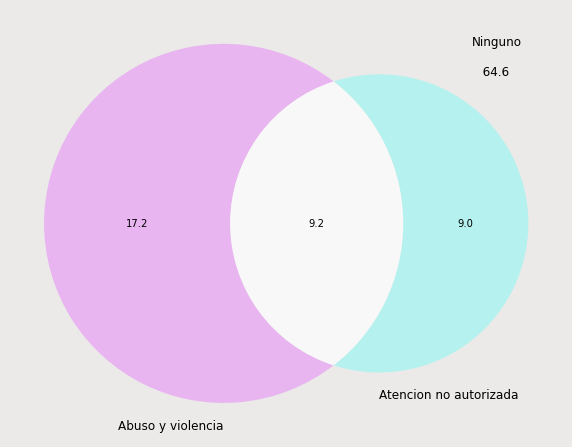

In [34]:
ocurrencias = seccionIX_cls["P9_8"].value_counts()
ocurrencias = np.around(ocurrencias/ocurrencias.sum()*1000)/10
fig = plt.figure(figsize=(10, 10), facecolor='#ebeae8')
v = vplt.venn2(subsets={'10':ocurrencias[1], '01':ocurrencias[2], '11':ocurrencias[3]}, set_labels=['Abuso y violencia', 'Atencion no autorizada'], set_colors=('#e89ff5', '#9ff5f1'), alpha = 0.7)
plt.text(0.5, 0.4, f"Ninguno\n\n   {ocurrencias[0]}", fontdict={'size':12})
plt.show()

### Cambiar los años de último embarazo a años pequeños

In [35]:
seccionIX_cls['P9_6'] = seccionIX_cls['P9_6']-2010

### Política de datos faltantes

En las columnas correspondientes a la pregunta 9.4. Resultado de ese (esos) embarazo(s) tiene valores 99 que significa que no cuenta con el registro original. Basandose en la posible respuesta de la pregunta 9.3. ¿Cuántos embarazos tuvo durante ese periodo? cambiaré a datos np.nan.

In [36]:
for i in range(1,4):
    seccionIX_cls = ModificarColumnasValor(df=seccionIX_cls, cols=[f'P9_4_{i}'], valorR=99, valorN=np.nan)

Segun el catalogo de esta variable, 99 significa que no se tiene registro, asi que se le pone el valor np.nan.

In [37]:
seccionIX_cls = ModificarColumnasValor(df=seccionIX_cls, cols=["P9_7"], valorR=99, valorN=np.nan)

Hay registros que todas las preguntas de la sección P9_8 tienen registros nulos. Estos son los que en P9_8_11 son nulos.

In [38]:
seccionIX_cls.drop(seccionIX_cls[(seccionIX_cls.P9_8_11!=2)&(seccionIX_cls.P9_8_11!=1)].index, axis=0, inplace=True)

### Borrar columnas

1. P9_2 porque tienen un único valor.
2. P9_8_{1,2,3,...,10,12} porque son los datos usados para crear la categoría de violencia.
3. P9_1_{1,2,3,...,9} y P9_5_{1,2,3,...,11} que se usaron para crear las columnas P9_1 y P9_5.


In [39]:
labels = ['NOM_ENT', 'NOM_MUN', 'COD_RES_MU', 'COD_RES', 'P9_2']
labels.extend([f'P9_1_{i}' for i in range(1,10)])
labels.extend([f'P9_5_{i}' for i in range(1,12)])
labels.extend([f'P9_8_{i}' for i in range(1,15)])

seccionIX_cls = BorrarColumnas(df=seccionIX_cls, cols=labels)

### Guardar dataset

In [40]:
seccionIX_cls.reset_index(drop=True, inplace=True) #reajustar el índice

# Overall

## Unir datasets

In [41]:
result = pd.merge(seccionI, seccionII_reg, how="inner")
result = pd.merge(result, seccionIX_cls, how="inner")

### Borrar columnas

1. ID_MUJ no es necesario ya que no necesitamos identificar a las mujeres y son caracteres unicos para cada registro.
2. ID_VIV son caracteres unicos para cada registro.
3. VIV_SEL y HOGAR no tiene sentido sin ID_VIV.
4. UPM (unidad primaria de muestreo), UPM_DIS (UPM de diseño), EST_DIS (estrato de diseño), REN_MUJ_ELE, REN_M_ELE (renglon de la mujer elegida), COD_RES_E, COD_RES_MU (resultado de entrevista a mujer elegida) y COD_RES (resultado de la visita a la vivienda) se pueden omitir al ser dato de la tecnica de muestreo y no de la mujer.
5. FAC_VIV es Ponderador que se utiliza para estimar resultados de las preguntas que se refieren a las viviendas y la población en general
6. FAC_MUJ es Ponderador que se utiliza para estimar resultados de las preguntas que se refieren a las mujeres de 15 años y más
7. [Prog](ttps://www.google.com/search?channel=fs&client=ubuntu&q=inegi+que+es+Progresivo+de+la+vivienda+seleccionada) sirve para identificar físicamente, sobre el terreno, la vivienda seleccionada.
8. NOM_ENT y NOM_MUN porque ya se tienen la clave.
9. SEXO tiene un solo valor.
10. CVE_MUN La clave de municipio depende del estado, habiendo un total de 32 municipios registrados como 1.

In [42]:
result = BorrarColumnas(df=result, cols=["ID_MUJ", 'ID_VIV', "VIV_SEL", "HOGAR", "UPM", 'UPM_DIS', "REN_M_ELE", 'EST_DIS',
                                         'FAC_VIV', 'FAC_MUJ', 'PROG', 'SEXO', 'CVE_MUN'])

### Borrar registros

1. Hay un registro que no sufrió violencia obstétrica donde varios valores no fueron capturados (los 9 yy 99).

In [43]:
result[result['P2_9']==9][['P2_9','NIV','P2_11','P2_13']]

,P2_9,NIV,P2_11,P2_13
5255,9.0,99.0,9.0,9.0


In [44]:
result.drop(index=result[result['P2_9']==9].index, axis=0, inplace=True)

In [45]:
result.reset_index(drop=True, inplace=True) #reajustar el índice

### Quitar caracteres especiales

Convierto las columnas de texto a numeros

In [46]:
encoder = OrdinalEncoder()

In [47]:
result['DOMINIO'] = encoder.fit_transform(result[['DOMINIO']])
encoder.categories_

[array(['C\r', 'R\r', 'U\r'], dtype=object)]

In [48]:
result['T_INSTRUM'] = encoder.fit_transform(result[['T_INSTRUM']])
encoder.categories_

[array(['A1\r', 'A2\r', 'B1\r', 'B2\r', 'C1\r', 'C2\r'], dtype=object)]

### Cambiar edades a rangos
Para la interpretabilidad se hacen rangos de cada 5 años.


|  Código  | Región     |
|:--------:|:----------:|
| 0        | 15 a 19    |
| 1        | 20 a 24    |
| 2        | 25 a 29    |
| 3        | 30 a 34    |
| 4        | 35 a 39    |
| 5        | 40 a 44    |
| 6        | 45 a 49    |

In [49]:
for i in range(7):
    actual = i*5 + 15
    result.loc[result[(result["EDAD"]>=actual) & (result["EDAD"]<actual+5)].index, "EDAD"] = i

## Acomodar columnas

Para una visioón estética del dataset se dejan las columnas con nombres indicando el tipo de pregunta que representa para el final.

In [50]:
# las columnas en el orden actual
columnas = list(result.columns)

# columnas que pasare al inicio del dataframe
columnas_al_principio = ['CVE_ENT', 'REGION', 'DOMINIO', 'T_INSTRUM', 'ESTRATO']

# quitar las columnas del lugar actual
for i in columnas_al_principio:
    columnas.remove(i)

# pasar al inicio de las columnas
columnas = columnas_al_principio+columnas
    
result = result[columnas]

### Cambiar nombre de columna

Para que los nombres sean más descriptivos en los resultados.

In [51]:
columns = {'P1_1': 'PISOS', 'P1_3': 'FOCOS', 'P1_5': 'AGUA', 'P1_6': 'DRENAJE', 'P2_5': 'RES_MADRE', 'P2_6': 'RES_PADRE', 'NIV': 'ESCOLARIDAD', 
           'P2_8': 'ALFABETISMO', 'P2_9': 'ASISTENCIA_ESC', 'P2_10': 'PERT_INDIGENA', 'P2_11': 'LENG_INDIGENA', 'P2_12': 'LENG_ESPAÑOL',
           'P2_13': 'TRABAJO', 'P9_4_1': 'NACIO_VIV', 'P9_4_2': 'NACIO_MUERT', 'P9_4_3': 'ABORTO'}

result.rename(columns = columns, inplace = True)

### Hacer columnas categóricas empiecen en 0

In [52]:
columnas_no_modificar = ['P1_2','P1_2_A','FOCOS','P1_7','P1_9', 'P9_3','NACIO_VIV','NACIO_MUERT','ABORTO','P9_8',
                         'REGION', 'DOMINIO',
                         'T_INSTRUM', 'EDAD', 'RES_PADRE', 'ALFABETISMO', 'ASISTENCIA_ESC', 'ESCOLARIDAD',
                         'LENG_INDIGENA','LENG_ESPAÑOL', 'TRABAJO', 'P2_14', 'P2_15', 'P9_1', 'P9_5']
columnas_no_modificar.extend([f'P1_4_{i}' for i in range(1, 10)])
columnas_no_modificar.extend([f'P1_10_{i}' for i in range(1, 5)])

for col in result.columns:
    if col not in columnas_no_modificar:
        result[col] = result[col]-1

El datset resultante tiene los datos flotantes, cambiamos a enteros.

In [53]:
columnas_nan = ['P1_10_1', 'P1_10_2', 'P1_10_3', 'P1_10_4', 'LENG_ESPAÑOL', 'P2_14', 'P2_15', 'P9_1', 'NACIO_VIV', 'NACIO_MUERT', 'ABORTO', 'P9_5', 'GRA']

for col in result.columns:
    if col not in columnas_nan:
        result[col] = result[col].astype(int)

### Guardar dataset

In [54]:
GuardarDataset(df=result, name='data/endireh.csv')

In [55]:
for col,nan in zip(result.columns,list(result.isnull().sum())):
    if nan != 0: print(col, nan)

P1_10_1 18098
P1_10_2 18098
P1_10_3 18098
P1_10_4 18098
GRA 297
LENG_ESPAÑOL 17459
P2_14 6296
P2_15 11947
P9_1 988
NACIO_VIV 11
NACIO_MUERT 9
ABORTO 9
P9_5 32


In [56]:
result.shape

(18882, 49)

In [57]:
result.columns

Index(['CVE_ENT', 'REGION', 'DOMINIO', 'T_INSTRUM', 'ESTRATO', 'PISOS', 'P1_2',
       'P1_2_A', 'FOCOS', 'P1_4_1', 'P1_4_2', 'P1_4_3', 'P1_4_4', 'P1_4_5',
       'P1_4_6', 'P1_4_7', 'P1_4_8', 'P1_4_9', 'AGUA', 'DRENAJE', 'P1_7',
       'P1_9', 'P1_10_1', 'P1_10_2', 'P1_10_3', 'P1_10_4', 'PAREN', 'EDAD',
       'RES_MADRE', 'RES_PADRE', 'ESCOLARIDAD', 'GRA', 'ALFABETISMO',
       'ASISTENCIA_ESC', 'PERT_INDIGENA', 'LENG_INDIGENA', 'LENG_ESPAÑOL',
       'TRABAJO', 'P2_14', 'P2_15', 'P9_1', 'P9_3', 'NACIO_VIV', 'NACIO_MUERT',
       'ABORTO', 'P9_5', 'P9_6', 'P9_7', 'P9_8'],
      dtype='object')

# Descripción de los datos resultantes

## General

1. CVE_ENT:     clave de entidad federativo (estado). Del 1 al 32.
3. REGION:      region geográfica creada en esta libreta. Del 0 al 7.
4. DOMINIO:     si vive en área urbana, semiurbana o rural. Del 0 al 2.
5. T_INSTRUM:   situación ormántica de la mujer elegida. Del 0 al 5.
5. ESTRATO;     representa la entidad, el ámbito geográfico y el estrato socioeconómico.

## SECCIÓN I. CARACTERÍSTICAS DE LA VIVIENDA Y HOGARES EN LA VIVIENDA

1. PISOS:        material del piso en la vivienda. Del 1 al 3.
2. P1_2:         cantidad de cuartos para dormir. Del 1 al 9.
3. P1_2_a:       cantidad de cuartos en la vivienda. Del 1 al 20.
4. FOCOS:        número de focos. Del 1 al 98.
5. P1_4:
    1. P1_4_1:   tiene aparato para oír radio. 0 o 1.
    6. P1_4_2:   tiene television. 0 o 1.
    7. P1_4_3:   tiene computadora. 0 o 1.
    8. P1_4_4:   tiene linea telefonica fija. 0 o 1.
    9. P1_4_5:   tiene telefono celular. 0 o 1.
    10. P1_4_6:  tiene refrigerador. 0 o 1.
    11. P1_4_7:  tiene lavadora. 0 o 1.
    12. P1_4_8:  tiene auto o camioneta. 0 o 1.
    13. P1_4_9:  tiene servicio de internet. 0 o 1.
14. AGUA:        tipos de acceso a agua que tienen en la vivienda. Del 1 al 6.
15. DRENAJE:     tipos de acceso a drenaje que tienen en la vivienda. Del 1 al 5.
16. P1_7:        cantidad de personas que viven en la vivienda. Del 1 a 25.
17. P1_9:        cuantos grupos de personas comparten gastos en la vivienda. Del 1 al 6.
18. P1_10:
    18. P1_10_1: comparten la renta. 0 o 1.
    19. P1_10_2: comparten gastos de servicios. 0 o 1.
    20. P1_10_3: comparten otros gastos. 0 o 1.
    21. P1_10_4: no comparten gastos. 0 o 1.

## SECCIÓN II. CARACTERÍSTICAS SOCIODEMOGRÁFICAS DE RESIDENTES DE LA VIVIENDA

1. PAREN:       parentezco de la mujer elegida a el/la jefe/jefa del hogar. Del 1 al 9.
2. EDAD:        rango de edad de la mujer elegida creado en esta libreta. Del 0 al 6.
3. RES_MADRE:   residencia de la madre (categorias creadas en esta libreta). Del 0 al 3.
4. RES_PADRE:   residencia del padre (categorias creadas en esta libreta). Del 0 al 3.
5. ESCOLARIDAD: último nivel de estudios cursado. Del 0 al 11.
6. GRA:         último grado de estudios cursado. Del 1 al 9.
7. ALFABETISMO: si sabe leer y escribir un recado. 0 o 1.
8. ASISTENCIA_ESC: si asiste actualmente a la escuela. 0 o 1.
9. PERT_INDIGENA:  si se considera indígene. 1 (si), 2 (si en parte), 3 (no) y 8 (no sabe).
10. LENG_INDIGENA:  si habla alguna lengua indígena. 0 o 1.
11. LENG_ESPAÑOL:  si habla español. 0, 1 0 2.
12. TRABAJO:    si trabajó la semana pasada. 0 o 1.
13. P2_14:      verificación de condición de actividad. Del 0 al 12.
14. P2_15:      posición en la ocupación. Del 0 al 6.

## SECCIÓN IX. ATENCIÓN OBSTÉTRICA

1. P9_1:        afiliación a servicios médicos. Del 0 al 9.
2. P9_3:        embarazos que tuvo durante el periodo de la encuesta. del 1 al 7.
3. NACIO_VIV:   cuantos partos el resultado nació vivo. Del 0 al 12.
4. NACIO_MUERT: cuantos partos el resultado nació muerto. Del 0 al 7.
5. ABORTO:      cuantos partos el resultado fue aborto. Del 0 al 7.
6. P9_5:        servicio médico donde atendió consultas prenatales. Del 0 al 11.
7. P9_6:        año del último parto. Del 1 al 6 representando del 2011 al 2016.
8. P9_7:        donde se atendió el parto. Del 0 al 5.
10. P9_8:       tipo de violencia sufrida. 0 (no sufrio violencia), 1 (abuso y violencia), 2 (atencion no autorizada) y 3 (ambas).